<a href="https://colab.research.google.com/github/ej970221/ORIE-4580/blob/main/HW3_KJ%2CER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 3

#### Students: Eunyoung(Katie) Jung (ej97) and Emuna Rouhani (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


Discussed Problems with

Jasmine Dequzman (jrd335), Jordan Quinones(jq53), Sean Benko (snb55), Amy Chitnumsab (ac2295), Jennifer Kim (jjk358), Shiyu Chen(sc4283)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

Reference: ChatGPT

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def ULCG(n, m, a, c, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output
# Functions to visualize LCG sequence on clock (see demo notebook)
def LCG(n, m, a, c, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        output[i] = x
        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='b'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


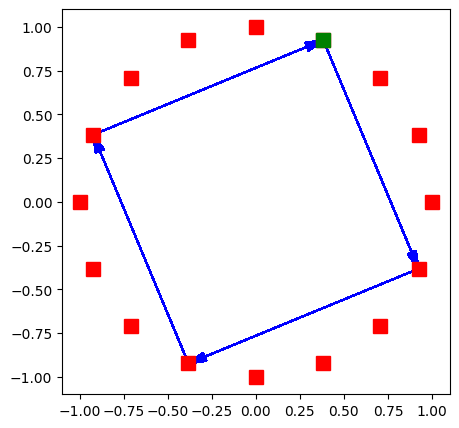

In [ ]:
fig = plt.figure(figsize=(5,5))
x = LCG(n=1000, m=16, a=5, c=0, seed=1)
ux = ULCG(n=1000, m=16, a=5, c=0, seed=1)
plot_clock_face(16, fig, annotate=False)
plot_clock_path(16, ux, fig, color='b')


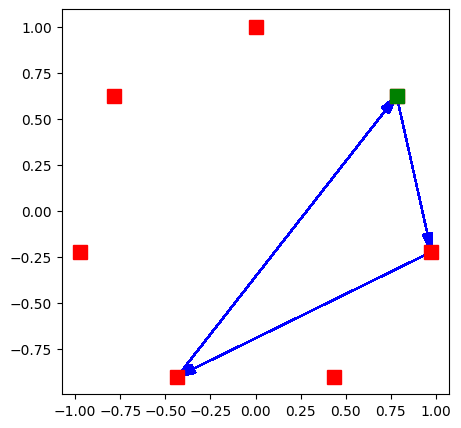

In [ ]:
fig = plt.figure(figsize=(5,5))
y = LCG(n=1000, m=7, a=2, c=0, seed=1)
uy = ULCG(n=1000, m=7, a=2, c=0, seed=1)
plot_clock_face(7, fig, annotate=False)
plot_clock_path(7, uy, fig, color='b')

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

Reference: ChatGPT

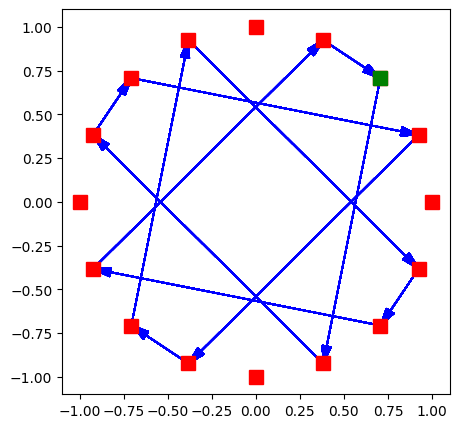

In [ ]:
fig = plt.figure(figsize=(5,5))
z = x + y
uz = []
for element in z:
    u = (element + 1.0) / 17.0
    uz.append(u)
plot_clock_face(16, fig, annotate=False)
plot_clock_path(16, uz, fig, color='b')

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

Reference: ChatGPT

### Ans.


In [ ]:

def find_period(var):
    period = None
    for i in range(1, len(var)):
        if var[i] == var[0]:
            period = i
            break
    return period

periodx = find_period(x)
print(f"The period of the LCG of x is {periodx}")


The period of the LCG of x is 4


In [ ]:
periody = find_period(y)
print(f"The period of the LCG of y is {periody}")


The period of the LCG of y is 3


In [ ]:
periody = find_period(z)
print(f"The period of the LCG of z is {periody}")

The period of the LCG of z is 12


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


Question 2 Reference: ChatGPT

___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

Giving that our $F^{-1}(y) = \inf\{x|F(x)\geq y\}$,

When $y<0, F(x) = 0$, meaning $\inf\{x|F(x)\geq y\}$ = $-\inf$

When $y = 0$, $F(x) = 0$  for $x<0$, $\inf\{x|F(x)\geq y\}$ = $-\inf$

When $ 0<y< \frac{1}{2}$, $F(x) = x$ for $0<x< \frac{1}{2}$, $\inf\{x|F(x)\geq y\}$ = $y$

when $\frac{1}{2} \leq y < 1 $, Indeed, our y will not take any value other than $\frac{1}{2}$, which means that our $F(x) =\frac{1}{2}$ for $\frac{1}{2} \leq x<1$, and therefore, the minimum value of $x$ when $F(x)$ is $\frac{1}{2}$, $\inf\{x|F(x)\geq y\}$ = $ \frac{1}{2}$

Because y is in the interval of [0,1], y will never exceed 1, and  $F(x) = 1$ for $x \geq 1$, Therefore,  $\inf\{x|F(x)\geq y\}$ = $1$

Therefore, our 	$$F^{-1}(y)=
	\begin{cases}
	-∞ & \mbox{for $y \leq 0$}\\
	y & \mbox{for $0 < y < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq y < 1$}, \\
	1 & \mbox{for $y= 1$}
	 \end{cases}$$



___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

Reference: ChatGPT

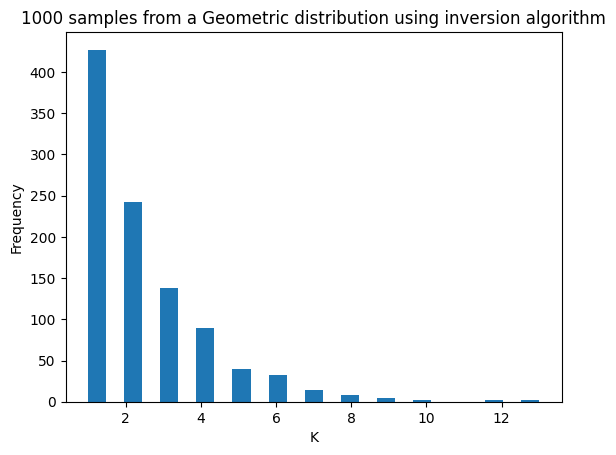

In [ ]:
from scipy import stats
from scipy.stats import geom

n = 1000
u = np.random.rand(n)

sample = [int(geom.ppf(u, 0.42)) for u in u] #creating inverse of geometric distributions
                                             #made sure that sample values are all integers.

# Plot histogram
plt.hist(sample, 25)
plt.xlabel('K')
plt.ylabel('Frequency')
plt.title('1000 samples from a Geometric distribution using inversion algorithm')
plt.show()




___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


Reference: ChatGPT

___

### Ans.

In order to implement this, we must find F(x)which is the c.d.f of f(x) calculated by $\int_{-∞}^∞ f(x) dx $.

Therefore,

For $0 \leq x \leq 2$,
$F(x) =  \int_{0}^x e^{x-2}dx$ = $e^{x-2}-e^{-2}$

For $x>2$, $F(x) = \int_{0}^2 e^{x-2}dx + \int_{2}^x e^{-x}dx = 1-e^{-x} $

Therefore, our $$
	F(x) =
	\begin{cases}
		e^{x-2}-e^{-2} & \text{for }0 \leq x \leq 2, \\
		1-e^{-x} & \text{for }x > 2, \\
	\end{cases}
	$$

Therefore, our inverse $F^{-1}(y)$ can be computed as we set $y = e^{x-2}-e^{-2} $, and solve for x, and similarly, $y= 1-e^{-x}$ and solve for x.

Then we get our $$
F^{-1}(y) =
	\begin{cases}
		ln(y+e^{-2})+2 & \text{for }0 \leq y \leq 1-e^{-2}, \\
		-ln(1-y) & \text{otherwise}, \\
	\end{cases}
	$$


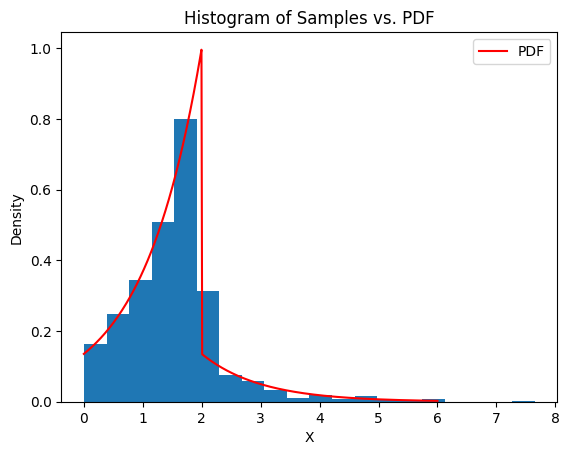

In [ ]:
# Find the inverse of F(x)
def inverse(y):
    if 0 <= y <= 1 - np.exp(-2):
        return np.log(y + np.exp(-2)) + 2
    else:
        return -np.log(1 - y)

# Generate random samples of X using inversion method
N = 1000
u = np.random.uniform(0, 1, N)
sample = [inverse(y) for y in u]


plt.hist(sample, bins=20, density =True)
x = np.linspace(0, 6, 500)
pdf = np.piecewise(x, [x <= 2, x > 2], [lambda x: np.exp(x-2), lambda x: np.exp(-x)])
plt.plot(x, pdf, 'r-', label="PDF")

plt.legend()
plt.xlabel("X")
plt.ylabel("Density")
plt.title("Histogram of Samples vs. PDF")
plt.show()

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.



Reference: ChatGPT

### Ans.


We find $M$, the maximum of $f(x)$ on $0 \leq x \leq 1$ to be $M = 3.25.$ We know that $f(x)$ is a positive, increasing function over $0 \leq x \leq 1$, so the maximum value will occur at $x = 1$. $f(1) = \frac{1}{4}(5(1)^4+4(1)^3+3(1)^2+1) = \frac{13}{4} = 3.25.$

In [ ]:
import random

def f(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4


def acceptance_rejection_sampling(num_samples):
    samples = []
    M = 3.25
    while len(samples) < num_samples:
        u1 = random.uniform(0, 1)
        x = 0+u1*(1-0)
        u2 = random.uniform(0, 1)
        if M*u2 <= f(x):
            samples.append(x)
    return samples


___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

Reference: ChatGPT

### Ans.

The number of samples it takes from the uniform distribution over $[0,1]$ until we generate a sample of $X$ can be modeled by a geometric distribtuion with probability of acceptance, $P$, being equal to the ration of the areas of the two distributions with the uniform distribution being in the denominator.

The area under $f(x)$ from $0 \leq x \leq 1$ is equal to $\\
 \int_{0}^{1} f(x) dx = \int_{0}^{1} \frac{1}{4}(5x^4+4x^3+3x^2+1) dx = 1.$

 This is expected because $f(x)$ is a valid pdf.

The ratio of these areas is equal to:
$P(acceptance) = 1 / M(b-a) = 1 / \frac{13}{4}$.

The expected value of a geometric distribution with probability $p$ is equal to $1/p$. In this case $p = 1 / \frac{13}{4}.$ Therefore $1/p=\frac{13}{4}. $

Since we are are generating 2 distributions and this gives us the probability for only one distribution, we must multiply the expected value by 2 so get an expected number of samples it takes from the uniform distribution over $[0,1]$ until we generate a sample of $X$ to be $\frac{13}{2} = 6.5$, so around 7 samples.

___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


Reference: ChatGPT

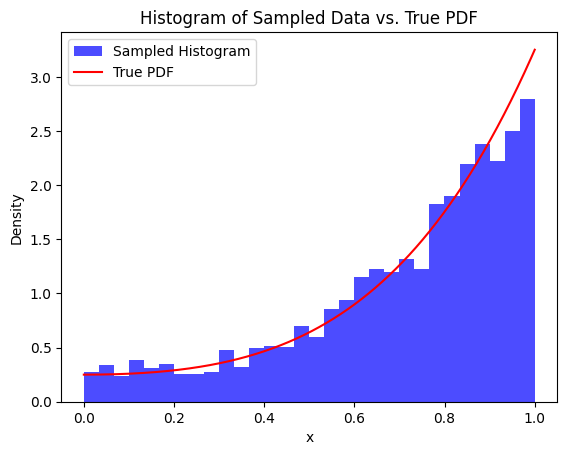

In [ ]:
import matplotlib.pyplot as plt

def true_pdf(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1) / 4

# Generate 2500 samples of X
samples = acceptance_rejection_sampling(2500)

# Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.7, color='blue', label='Sampled Histogram')

# Generate x values for true pdf
x_values = np.linspace(0, 1, 1000)
y_values = [true_pdf(x) for x in x_values]

# Plot true pdf
plt.plot(x_values, y_values, color='red', label='True PDF')

# Set labels and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Sampled Data vs. True PDF')
plt.legend()

# Show plot
plt.show()


___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

Reference: ChatGPT

Here, we used the python function called scipy.stats.ppf().
Behind this function, to get the inversion algorithm for the distribution, first we must find c.d.f from given pdf $g(x) = e^{-|x|}/2$.
Then, we must find the inverse function $F^{-1}(y)$ by setting $y = F(x)$ and solve it for x.

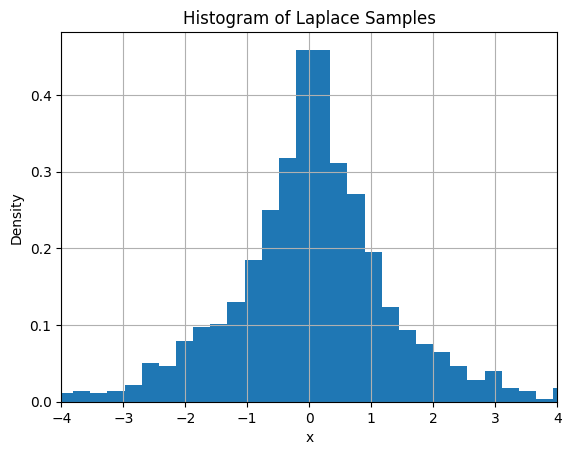

In [ ]:
from scipy.stats import laplace

# Generate random samples from Laplace distribution
N = 1000
U = np.random.uniform(0, 1, N)
samples = laplace.ppf(U)

# Plotting histogram
plt.hist(samples, bins='auto', density=True)
plt.xlim(-4,4)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Laplace Samples')
plt.grid(True)
plt.show()

___


**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

The smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$ can be found by solving the following inequality for $k$:

$k e^{-|x|}/2 \geq\frac{e^{-x^2/2}}{\sqrt{2\pi}}$

$k \geq\ {{\frac{e^{-x^2/2}}{\sqrt{2\pi}}} \over {e^{-|x|}/2}}$

To find the smallest $k$, we must maximize the term in the right hand side, ${\frac{e^{-x^2/2}}{\sqrt{2\pi}}} \over {e^{-|x|}/2}$, so that $kg(x)$ will always be greater than $f(x)$ $\forall\,x\in\mathbb{R}.$ The maximum of this function occurs at $x = 1.$ Substituting this in, we get:

$k \geq\ {{\frac{e^{-(1)^2/2}}{\sqrt{2\pi}}} \over {e^{-(1)}/2}}$

$k \geq\ {{\frac{e^{-1/2}}{\sqrt{2\pi}}} \over {e^{-1}/2}}$

$ k \geq\ \frac{\sqrt{2e}}{\pi}.$


The acceptance-rejection algorithm to sample from the target distribution $X \sim \mathcal{N}(0,1)$ is as follows:

1. Generate a random sample $x$ from the proposal distribution $g(x) = {e^{-|x|}/2}$.
2. Generate a uniform random variable $u$ in the interval $[0, 1]$.
3. If $u \leq \frac{f(x)}{kg(x)}$, accept the sample $x$. Otherwise, reject it.
4. Repeat steps 1-3 until you obtain an accepted sample.

The expected number of samples needed for generating each sample is given by $\frac{1}{\frac{f(x)}{kg(x)}} = \frac{kg(x)}{f(x)}\$.

$P(U_2 \leq f(U_1)) =  \int_{-∞}^{∞} P(U_2 \leq f(U_1) | U_1 = u) P(U_1= u)) \mathrm{d}u  $

$P(U_2 \leq f(U_1)) =  \int_{-∞}^{∞} {{f(u)}\over{kg(u)}}g(u) \mathrm{d}u  $

$= \frac{1}{k} \int_{-∞}^{∞} {f(u)} \mathrm{d}u = \frac{1}{k}$

The mean sample needed is equal to $2 (\frac{1}{1/k}) = 2k = 2 {\sqrt{2e\over \pi}}. $

___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

Reference: ChatGPT

95% Confidence Interval: (1996.48, 2002.06)
Average Expected Number: 1999.27


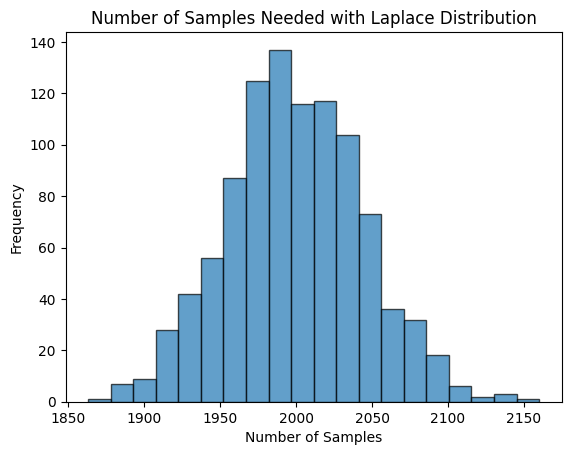

In [ ]:
import scipy.stats

def f(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi) #normal pdf

def g(x):
    return np.exp(-np.abs(x)) / 2 #laplace pdf

# k value
ratio = f(x) / g(x)
k = max(np.max(ratio) ,2)

def accept_reject(num_samples=1000):
    count = 0
    accepted = []
    while len(accepted) < num_samples:
        x = np.random.laplace()
        u = np.random.uniform()
        if u <= f(x) / (k * g(x)):
            accepted.append(x)
        count += 1
    return count, accepted


samples_needed = []

for i in range(1000):
    count, i = accept_reject()
    samples_needed.append(count)

mean_samples = np.mean(samples_needed)
std_samples = np.std(samples_needed)

CI_lower = mean_samples - 1.96 * (std_samples / np.sqrt(1000))
CI_upper = mean_samples + 1.96 * (std_samples / np.sqrt(1000))

print(f"95% Confidence Interval: ({CI_lower:.2f}, {CI_upper:.2f})")
print(f"Average Expected Number: {mean_samples:.2f}")

plt.hist(samples_needed, bins=20, edgecolor="k", alpha=0.7)
plt.title("Number of Samples Needed with Laplace Distribution")
plt.xlabel("Number of Samples")
plt.ylabel("Frequency")
plt.show()



___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

___

Reference: ChatGPT

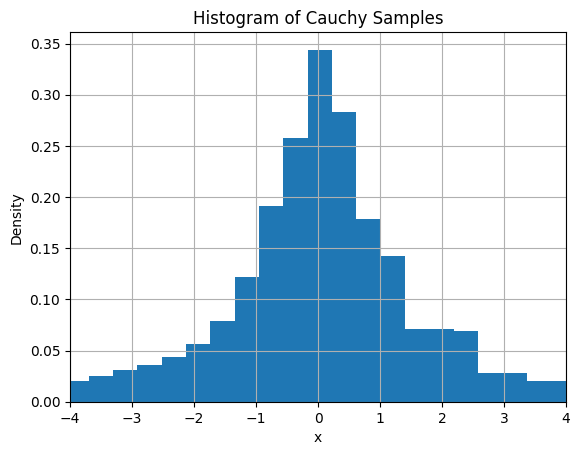

In [ ]:
from scipy.stats import cauchy

# Generate random samples from Laplace distribution
N = 1000
U = np.random.uniform(0, 1, N)
samples = cauchy.ppf(U)

# Plotting histogram
plt.hist(samples, bins='auto', density=True)
plt.xlim(-4, 4)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Cauchy Samples')
plt.grid(True)
plt.show()

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

Reference: ChatGPT

### Ans.

Because $kg(x) \geq f(x)$

In this case $k\ge \frac{e^{-x^2/2}}{\sqrt{2\pi}}*\pi(1+x^2)$

X that maximizes $\frac{e^{-x^2/2}}{\sqrt{2\pi}}*\pi(1+x^2)$ is also 1.

Plugging 1 into our x, we get $ k \ge 2\sqrt{\frac{\pi}{2e}}$

Using same analysis, the expected number of samples needed is 2k, here it is
$4\sqrt{\frac{\pi}{2e}}$

We can compute this by simulation as well.

95% Confidence Interval: (1517.88, 1521.48)
Average Expected Number: 1519.68


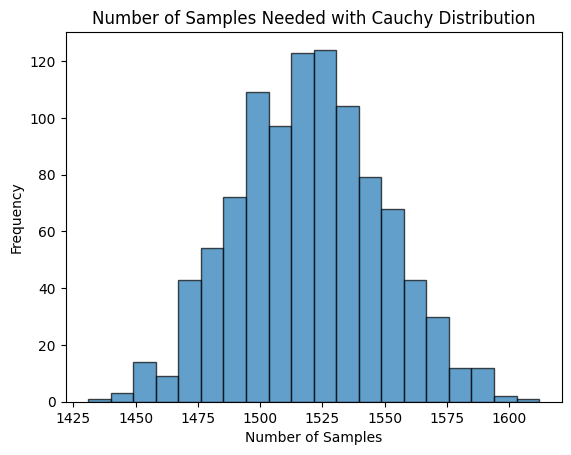

In [ ]:
# Define the target and proposal PDFs
def f(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def g(x):
    return 1 / (np.pi * (1 + x**2)) #cauchy distribution

ratio = f(x_values) / g(x_values)
k = np.max(ratio)

# Acceptance-Rejection algorithm
def accept_reject(num_samples=1000):
    count = 0
    accepted = []
    while len(accepted) < num_samples:
        x = np.random.standard_cauchy()
        u = np.random.uniform()
        if u <= f(x) / (k * g(x)):
            accepted.append(x)
        count += 1
    return count, accepted

samples_needed = []

for i in range(1000):
    count,  i= accept_reject()
    samples_needed.append(count)

mean_samples = np.mean(samples_needed)
std_samples = np.std(samples_needed)


margin_error = 1.96 * (std_samples / np.sqrt(1000))
CI_lower = mean_samples -  1.96* (std_samples / np.sqrt(1000))
CI_upper = mean_samples + 1.96 * (std_samples / np.sqrt(1000))

print(f"95% Confidence Interval: ({CI_lower:.2f}, {CI_upper:.2f})")
print(f"Average Expected Number: {mean_samples:.2f}")


plt.hist(samples_needed, bins=20, edgecolor="k", alpha=0.7)
plt.title("Number of Samples Needed with Cauchy Distribution")
plt.xlabel("Number of Samples")
plt.ylabel("Frequency")
plt.show()
